In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#! pip install openpyxl

In [8]:
def get_Iq_Id(path:str)->pd.DataFrame:
    path = pd.read_excel(str(path)+'.xlsx', header=None, usecols=[0, 1, 2], names=['IA', 'IB', 'IC'])
    
    def Iq(data:pd.DataFrame)->pd.DataFrame:
    	return (1.0/(2**0.5))*(data.iloc[:,1]-data.iloc[:,2])
    
    def Id(data:pd.DataFrame)->pd.DataFrame:
    	ia = ((2./3)**0.5)*data.iloc[:,0]
    	ib = (1./(6**0.5))*data.iloc[:,1]
    	ic = (1./(6**0.5))*data.iloc[:,2]
    
    	result = ia - ib - ic
    	return result
    
    path['IQ']=Iq(path)
    path['ID'] = Id(path)
    
    return path

In [9]:
healthy_data = get_Iq_Id('H')
open1 = get_Iq_Id('1open')
open2 = get_Iq_Id('2open')
open3 = get_Iq_Id('3open')
open4 = get_Iq_Id('4open')
open5 = get_Iq_Id('5open')
open6 = get_Iq_Id('6open')
open12 = get_Iq_Id('12open')
open13 = get_Iq_Id('13open')
open14 = get_Iq_Id('14open')
open15 = get_Iq_Id('15open')
open16 = get_Iq_Id('16open')


In [10]:
data_0 = [healthy_data
        ,open1
        ,open2
        ,open3
        ,open4
        ,open5
        ,open6
        ,open12
        ,open13
        ,open14
        ,open15
        ,open16]

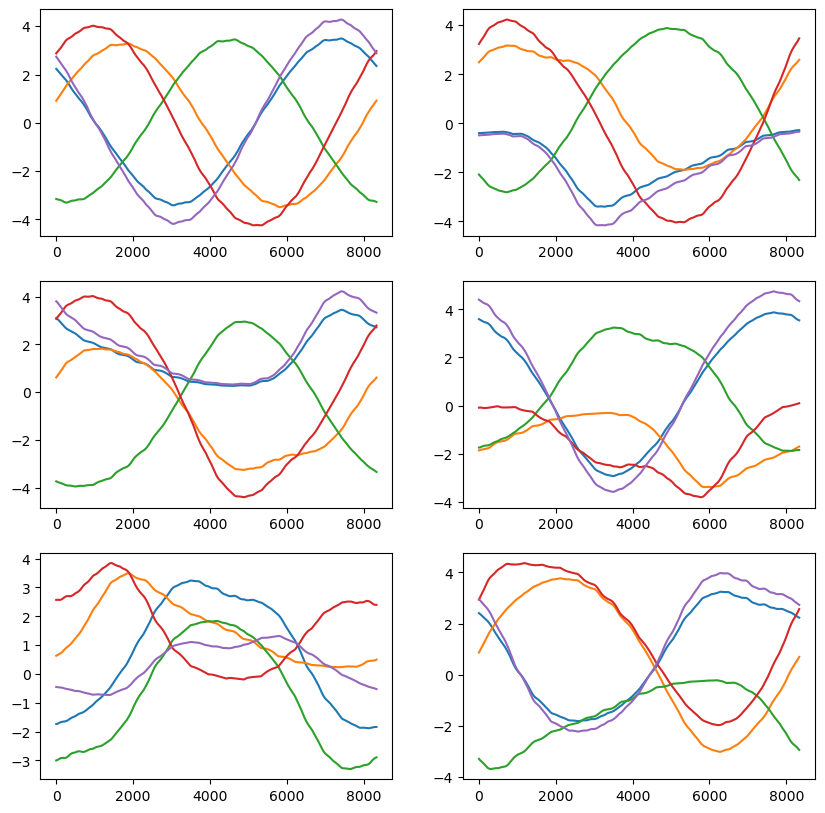

In [11]:
plt.figure(figsize=(10,10))
for i in range((len(data_0)//2)):
    plt.subplot(3, 2, i+1)
    plt.plot(data_0[i])

In [12]:
def get_features(full:pd.DataFrame,x:pd.DataFrame,y:pd.DataFrame)->pd.DataFrame:
    med_x = np.median(x)
    med_y = np.median(y)
    
    dummy = pd.DataFrame([[med_x,med_y]])
    
    med_y1 = full.loc[x<=med_x,['IQ','ID']]
    med_x1 = full.loc[y<=med_y,['IQ','ID']]
    
    a = med_y1.head(1)
    b = med_y1.tail(1)
    c = med_x1.head(1)
    d = med_x1.tail(1)
    
    return pd.DataFrame(np.hstack((dummy,a,b,c,d)),columns=['median_x','median_y','points_x1','points_y1','points_x2','points_y2','points_x3','points_y3','points_x4','points_y4'],)

In [13]:
features = get_features(healthy_data,healthy_data['IQ'],healthy_data['ID'])

In [14]:
features = features.reset_index(drop=True)

In [15]:
for i in range(1,(len(data_0)//2)+1):
    features= features.append(get_features(data_0[i],data_0[i]['IQ'],data_0[i]['ID']))

C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_7320\1046773540.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features= features.append(get_features(data_0[i],data_0[i]['IQ'],data_0[i]['ID']))
C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_7320\1046773540.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features= features.append(get_features(data_0[i],data_0[i]['IQ'],data_0[i]['ID']))
C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_7320\1046773540.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features= features.append(get_features(data_0[i],data_0[i]['IQ'],data_0[i]['ID']))
C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_7320\1046773540.py:2: FutureWarning: The frame.append method is deprecated and will be r

In [16]:
features

,median_x,median_y,points_x1,points_y1,points_x2,points_y2,points_x3,points_y3,points_x4,points_y4
0,-0.010053,-0.027711,-0.013265,-4.155529,-0.010053,4.214940,3.994504,-0.028060,-4.234925,-0.027711
0,-0.114004,-1.679206,-0.116014,-4.148596,-0.114004,-0.660057,2.740320,-1.679216,-3.211027,-1.679206
0,0.001403,1.637023,0.001403,0.754664,-0.000224,4.162132,2.972730,1.637023,-2.749747,1.635385
0,-1.853260,1.278385,-1.853623,-2.241037,-1.853260,3.794933,-0.429503,1.277781,-3.770979,1.278385
0,1.793486,0.545962,1.793486,0.528170,1.792536,0.567068,2.569807,-0.449480,2.399141,-0.524882
0,1.989217,1.255643,1.989217,-1.079898,1.986517,2.976616,4.318647,1.255643,-0.096537,1.254023
0,-1.965891,-1.167720,-1.966609,-2.969280,-1.965891,1.165875,-0.071717,-1.167720,-4.050314,-1.169151


In [17]:
for i in range((len(data_0)//2)+1,len(data_0)):
    features= features.append(get_features(data_0[i],data_0[i]['IQ'],data_0[i]['ID']))

C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_7320\2936467689.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features= features.append(get_features(data_0[i],data_0[i]['IQ'],data_0[i]['ID']))
C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_7320\2936467689.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features= features.append(get_features(data_0[i],data_0[i]['IQ'],data_0[i]['ID']))
C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_7320\2936467689.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features= features.append(get_features(data_0[i],data_0[i]['IQ'],data_0[i]['ID']))
C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_7320\2936467689.py:2: FutureWarning: The frame.append method is deprecated and will be r

In [18]:
features

,median_x,median_y,points_x1,points_y1,points_x2,points_y2,points_x3,points_y3,points_x4,points_y4
0,-0.010053,-0.027711,-0.013265,-4.155529e+00,-0.010053,4.214940,3.994504,-0.028060,-4.234925,-0.027711
0,-0.114004,-1.679206,-0.116014,-4.148596e+00,-0.114004,-0.660057,2.740320,-1.679216,-3.211027,-1.679206
0,0.001403,1.637023,0.001403,7.546643e-01,-0.000224,4.162132,2.972730,1.637023,-2.749747,1.635385
0,-1.853260,1.278385,-1.853623,-2.241037e+00,-1.853260,3.794933,-0.429503,1.277781,-3.770979,1.278385
0,1.793486,0.545962,1.793486,5.281698e-01,1.792536,0.567068,2.569807,-0.449480,2.399141,-0.524882
0,1.989217,1.255643,1.989217,-1.079898e+00,1.986517,2.976616,4.318647,1.255643,-0.096537,1.254023
0,-1.965891,-1.167720,-1.966609,-2.969280e+00,-1.965891,1.165875,-0.071717,-1.167720,-4.050314,-1.169151
0,-0.093985,0.000013,-0.095471,8.371049e-07,-0.093985,0.000045,2.026739,0.000013,-0.977127,0.000013
0,-1.700281,-1.253082,-1.701346,-3.022104e+00,-1.700281,-0.804152,-0.678145,-1.255196,-2.624940,-1.253082
0,0.557851,-2.537266,0.557365,-4.560043e+00,0.557851,-1.497422,2.471099,-2.537326,0.092445,-2.537266


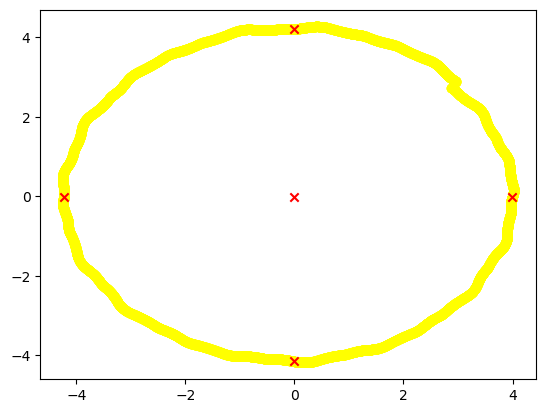

In [19]:
plt.scatter(data_0[0]['IQ'], data_0[0]['ID'],c='yellow', label='Points')
plt.scatter(features.iloc[0,0], features.iloc[0,1], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[0,2], features.iloc[0,3], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[0,4], features.iloc[0,5], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[0,6], features.iloc[0,7], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[0,8], features.iloc[0,9], c='red', marker='x', label='Midpoint')

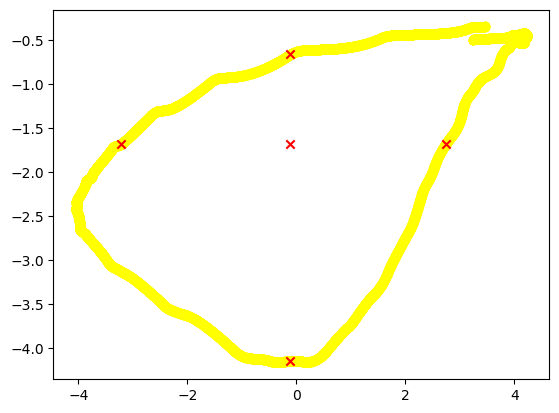

In [20]:
plt.scatter(data_0[1]['IQ'], data_0[1]['ID'],c='Yellow', label='Points')
plt.scatter(features.iloc[1,0], features.iloc[1,1], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[1,2], features.iloc[1,3], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[1,4], features.iloc[1,5], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[1,6], features.iloc[1,7], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[1,8], features.iloc[1,9], c='red', marker='x', label='Midpoint')

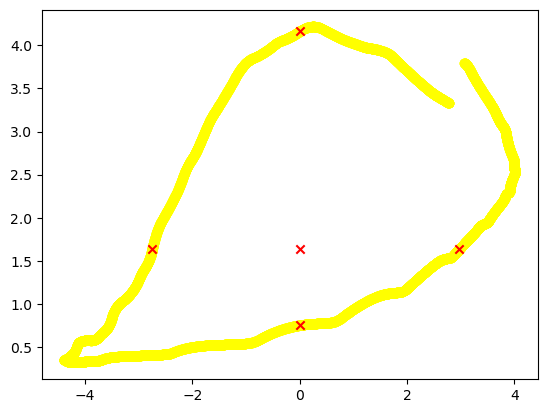

In [21]:
plt.scatter(data_0[2]['IQ'], data_0[2]['ID'],c='Yellow', label='Points')
plt.scatter(features.iloc[2,0], features.iloc[2,1], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[2,2], features.iloc[2,3], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[2,4], features.iloc[2,5], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[2,6], features.iloc[2,7], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[2,8], features.iloc[2,9], c='red', marker='x', label='Midpoint')

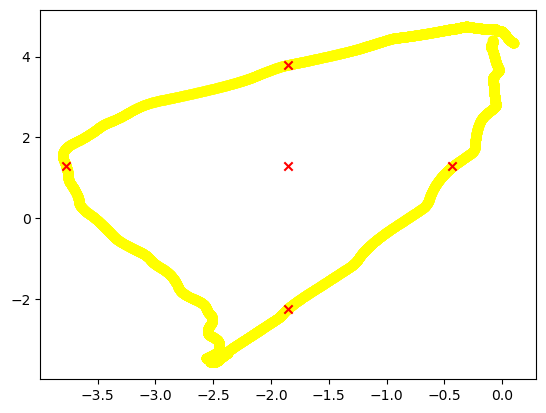

In [22]:
plt.scatter(data_0[3]['IQ'], data_0[3]['ID'],c='Yellow', label='Points')
plt.scatter(features.iloc[3,0], features.iloc[3,1], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[3,2], features.iloc[3,3], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[3,4], features.iloc[3,5], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[3,6], features.iloc[3,7], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[3,8], features.iloc[3,9], c='red', marker='x', label='Midpoint')

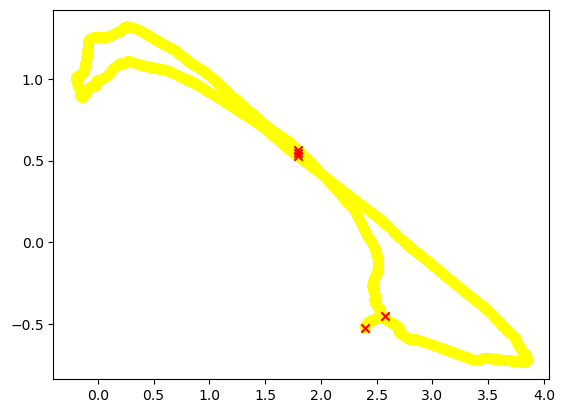

In [23]:
plt.scatter(data_0[4]['IQ'], data_0[4]['ID'],c='Yellow', label='Points')
plt.scatter(features.iloc[4,0], features.iloc[4,1], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[4,2], features.iloc[4,3], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[4,4], features.iloc[4,5], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[4,6], features.iloc[4,7], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[4,8], features.iloc[4,9], c='red', marker='x', label='Midpoint')

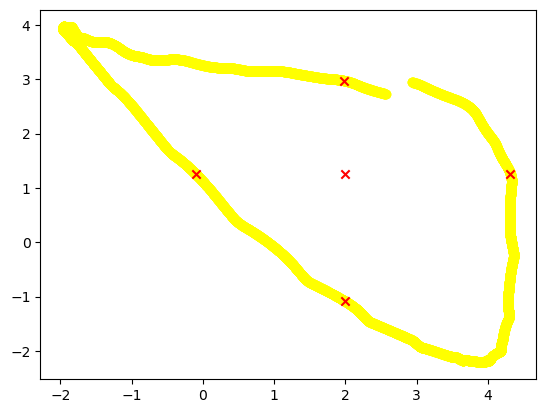

In [24]:
plt.scatter(data_0[5]['IQ'], data_0[5]['ID'],c='Yellow', label='Points')
plt.scatter(features.iloc[5,0], features.iloc[5,1], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[5,2], features.iloc[5,3], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[5,4], features.iloc[5,5], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[5,6], features.iloc[5,7], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[5,8], features.iloc[5,9], c='red', marker='x', label='Midpoint')

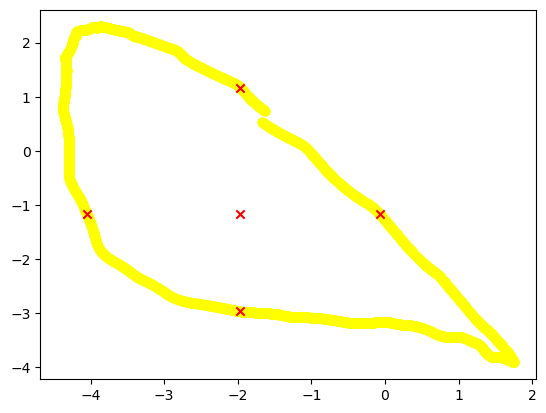

In [25]:
plt.scatter(data_0[6]['IQ'], data_0[6]['ID'],c='Yellow', label='Points')
plt.scatter(features.iloc[6,0], features.iloc[6,1], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[6,2], features.iloc[6,3], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[6,4], features.iloc[6,5], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[6,6], features.iloc[6,7], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[6,8], features.iloc[6,9], c='red', marker='x', label='Midpoint')

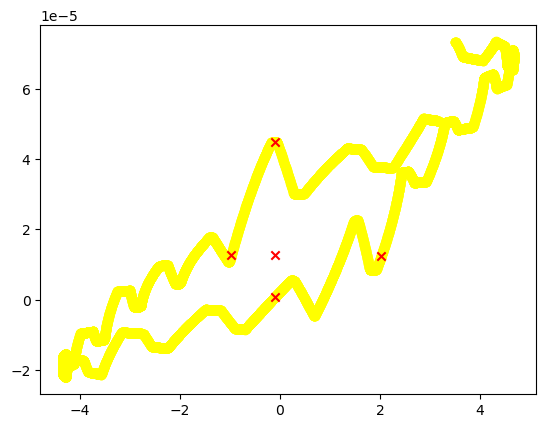

In [26]:
plt.scatter(data_0[7]['IQ'], data_0[7]['ID'],c='Yellow', label='Points')
plt.scatter(features.iloc[7,0], features.iloc[7,1], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[7,2], features.iloc[7,3], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[7,4], features.iloc[7,5], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[7,6], features.iloc[7,7], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[7,8], features.iloc[7,9], c='red', marker='x', label='Midpoint')

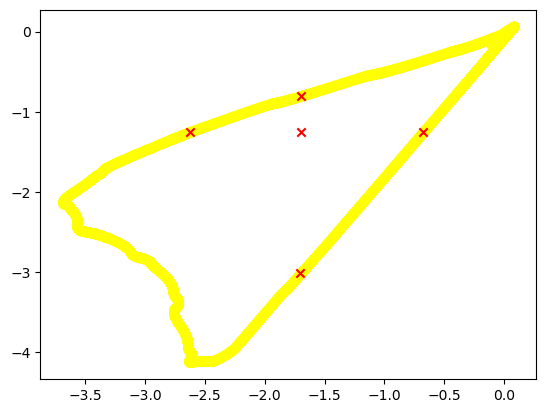

In [27]:
plt.scatter(data_0[8]['IQ'], data_0[8]['ID'],c='Yellow', label='Points')
plt.scatter(features.iloc[8,0], features.iloc[8,1], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[8,2], features.iloc[8,3], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[8,4], features.iloc[8,5], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[8,6], features.iloc[8,7], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[8,8], features.iloc[8,9], c='red', marker='x', label='Midpoint')

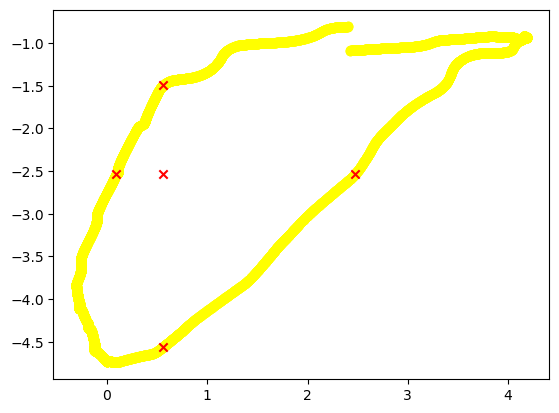

In [28]:
plt.scatter(data_0[9]['IQ'], data_0[9]['ID'],c='Yellow', label='Points')
plt.scatter(features.iloc[9,0], features.iloc[9,1], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[9,2], features.iloc[9,3], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[9,4], features.iloc[9,5], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[9,6], features.iloc[9,7], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[9,8], features.iloc[9,9], c='red', marker='x', label='Midpoint')

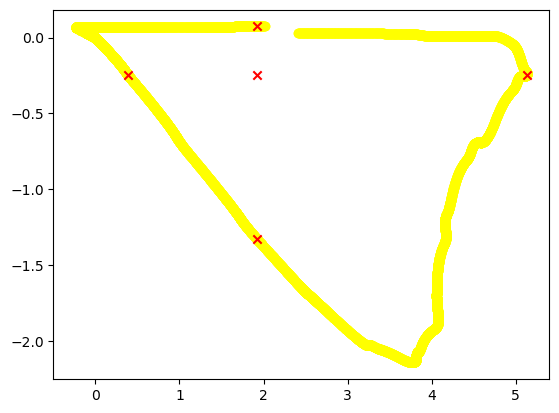

In [29]:
plt.scatter(data_0[10]['IQ'], data_0[10]['ID'],c='Yellow', label='Points')
plt.scatter(features.iloc[10,0], features.iloc[10,1], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[10,2], features.iloc[10,3], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[10,4], features.iloc[10,5], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[10,6], features.iloc[10,7], c='red', marker='x', label='Midpoint')
plt.scatter(features.iloc[10,8], features.iloc[10,9], c='red', marker='x', label='Midpoint')

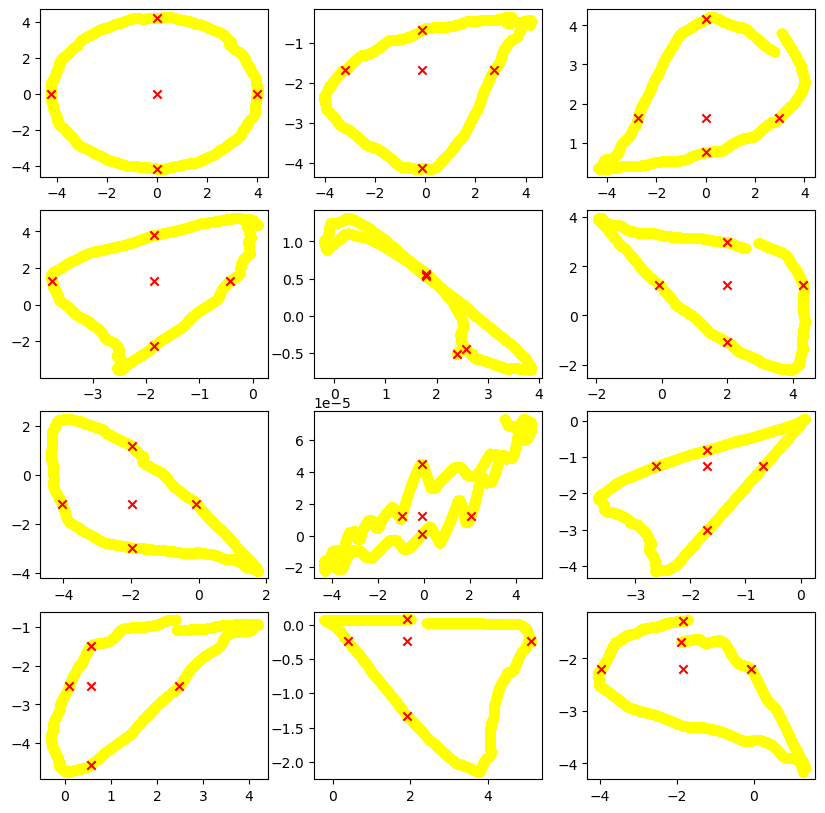

In [30]:
plt.figure(figsize=(10,10))
for i in range(len(data_0)):
    plt.subplot(4, 3, i+1)
    plt.scatter(data_0[i]['IQ'], data_0[i]['ID'],c='yellow', label='Points')
    plt.scatter(features.iloc[i,0], features.iloc[i,1], c='red', marker='x', label='Midpoint')
    plt.scatter(features.iloc[i,2], features.iloc[i,3], c='red', marker='x', label='Midpoint')
    plt.scatter(features.iloc[i,4], features.iloc[i,5], c='red', marker='x', label='Midpoint')
    plt.scatter(features.iloc[i,6], features.iloc[i,7], c='red', marker='x', label='Midpoint')
    plt.scatter(features.iloc[i,8], features.iloc[i,9], c='red', marker='x', label='Midpoint')

In [31]:
features.shape

(12, 10)

In [32]:
data1 = ['healthy_data'
        ,'open1'
        ,'open2'
        ,'open3'
        ,'open4'
        ,'open5'
        ,'open6'
        ,'open12'
        ,'open13'
        ,'open14'
        ,'open15'
        ,'open16']

In [33]:
features['class'] = data1

In [34]:
features

,median_x,median_y,points_x1,points_y1,points_x2,points_y2,points_x3,points_y3,points_x4,points_y4,class
0,-0.010053,-0.027711,-0.013265,-4.155529e+00,-0.010053,4.214940,3.994504,-0.028060,-4.234925,-0.027711,healthy_data
0,-0.114004,-1.679206,-0.116014,-4.148596e+00,-0.114004,-0.660057,2.740320,-1.679216,-3.211027,-1.679206,open1
0,0.001403,1.637023,0.001403,7.546643e-01,-0.000224,4.162132,2.972730,1.637023,-2.749747,1.635385,open2
0,-1.853260,1.278385,-1.853623,-2.241037e+00,-1.853260,3.794933,-0.429503,1.277781,-3.770979,1.278385,open3
0,1.793486,0.545962,1.793486,5.281698e-01,1.792536,0.567068,2.569807,-0.449480,2.399141,-0.524882,open4
0,1.989217,1.255643,1.989217,-1.079898e+00,1.986517,2.976616,4.318647,1.255643,-0.096537,1.254023,open5
0,-1.965891,-1.167720,-1.966609,-2.969280e+00,-1.965891,1.165875,-0.071717,-1.167720,-4.050314,-1.169151,open6
0,-0.093985,0.000013,-0.095471,8.371049e-07,-0.093985,0.000045,2.026739,0.000013,-0.977127,0.000013,open12
0,-1.700281,-1.253082,-1.701346,-3.022104e+00,-1.700281,-0.804152,-0.678145,-1.255196,-2.624940,-1.253082,open13
0,0.557851,-2.537266,0.557365,-4.560043e+00,0.557851,-1.497422,2.471099,-2.537326,0.092445,-2.537266,open14


In [35]:
d = np.vstack((features.iloc[:,0:2],features.iloc[:,2:4],features.iloc[:,4:6],features.iloc[:,6:8],features.iloc[:,8:10]))

In [36]:
final_data = pd.DataFrame(d,columns=['x','y'])

In [37]:
final_data['Class'] = np.hstack((features.iloc[:,-1],features.iloc[:,-1],features.iloc[:,-1],features.iloc[:,-1],features.iloc[:,-1]))

In [38]:
final_data

,x,y,Class
0,-0.010053,-2.771150e-02,healthy_data
1,-0.114004,-1.679206e+00,open1
2,0.001403,1.637023e+00,open2
3,-1.853260,1.278385e+00,open3
4,1.793486,5.459616e-01,open4
5,1.989217,1.255643e+00,open5
6,-1.965891,-1.167720e+00,open6
7,-0.093985,1.258536e-05,open12
8,-1.700281,-1.253082e+00,open13
9,0.557851,-2.537266e+00,open14


In [39]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [40]:
scaler = StandardScaler()

In [41]:
final_data.iloc[:,:2] = scaler.fit_transform(final_data.iloc[:,:2])

In [42]:
final_data

,x,y,Class
0,0.010141,0.221968,healthy_data
1,-0.039295,-0.665097,open1
2,0.015589,1.116145,open2
3,-0.866432,0.923510,open3
4,0.867849,0.530105,open4
5,0.960933,0.911295,open5
6,-0.919996,-0.390363,open6
7,-0.029774,0.236860,open12
8,-0.793679,-0.436213,open13
9,0.280219,-1.125985,open14


In [43]:
final_data['class1'] = np.where(final_data['Class']=='healthy_data',1,0)

<Axes: xlabel='x', ylabel='y'>

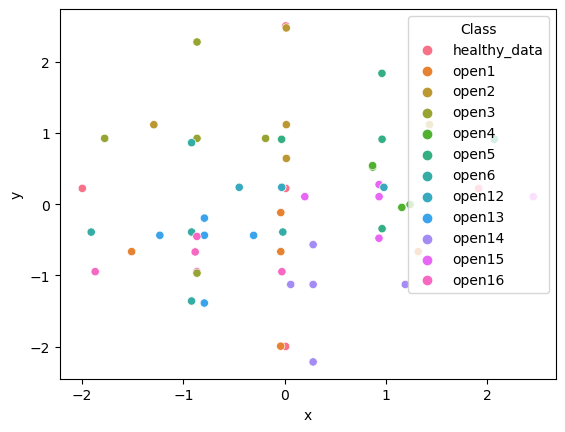

In [44]:
sns.scatterplot(final_data,x='x',y='y',hue='Class')

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Assuming 'data' is your DataFrame
X = final_data.iloc[:, :2]  # Features
y = final_data.iloc[:, -1]   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print(f"Accuracy: {accuracy} %")
 

Accuracy: 66.67 %


In [47]:
recall_score(y_test, y_pred)

0.0

In [42]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[8, 0],
       [4, 0]], dtype=int64)

In [56]:
from sklearn.metrics import multilabel_confusion_matrix,classification_report,class_likelihood_ratios


In [55]:
report  = classification_report(y_test,y_pred)
print(report)

NameError: name 'classification_report' is not defined

In [50]:
multi = multilabel_confusion_matrix(y_test,y_pred)
multi 

array([[[0, 4],
        [0, 8]],

       [[8, 0],
        [4, 0]]], dtype=int64)

In [60]:
from sklearn.metrics import f1_score,precision_score
# f1 = f1_score(y_test,y_pred)
# f1
prec = precision_score(y_test,y_pred)
prec

C:\Users\Rishikesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [61]:
m = final_data.iloc[:, :2]  # Features
n = final_data.iloc[:, -1]

In [63]:
pip install lazypredict


  Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/74/02/5ad29a2a3d193a87d5a05fb7fd3b4e30b8eb6db7a9ddbe193beb7053978f/lightgbm-4.2.0-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB 8.6 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.3 MB 9.4 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.3 MB 7.9 MB/s eta 0:00:01
   --------------------------------- ------ 1.1/1.3 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 6.5 MB/s eta 0:00:00

In [65]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split


In [66]:
m


,x,y
0,0.01,0.22
1,-0.04,-0.67
2,0.02,1.12
3,-0.87,0.92
4,0.87,0.53
5,0.96,0.91
6,-0.92,-0.39
7,-0.03,0.24
8,-0.79,-0.44
9,0.28,-1.13


In [67]:
n

0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    1
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    1
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    1
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
Name: class1, dtype: int32

In [68]:
X = final_data.iloc[:, :2]  # Features
y = final_data.iloc[:, -1]   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)



In [48]:
from sklearn import svm


In [49]:
# svm using radial bais function 

rbf  = svm.SVC(kernel='rbf',gamma = 0.5,C=0.1).fit(X_train,y_train)


In [50]:
poly = svm.SVC(kernel='poly',degree=3 ,C=1).fit(X_train, y_train)

In [67]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [52]:
from sklearn.metrics import f1_score

In [53]:
poly_acc = accuracy_score(y_test,poly_pred)
poly_f1 = f1_score(y_test,poly_pred)

In [54]:
poly_acc

0.6666666666666666

In [60]:
poly_cf = classification_report(y_test,poly_pred)
print(poly_cf)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         8
           1       0.00      0.00      0.00         4

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



C:\Users\Rishikesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rishikesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rishikesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')

In [66]:
rbf_k = classification_report(y_test,rbf_pred)
print(rbf_k)

InvalidParameterError: The 'y_pred' parameter of classification_report must be an array-like or a sparse matrix. Got '              precision    recall  f1-score   support\n\n           0       0.67      1.00      0.80         8\n           1       0.00      0.00      0.00         4\n\n    accuracy                           0.67        12\n   macro avg       0.33      0.50      0.40        12\nweighted avg       0.44      0.67      0.53        12\n' instead.

In [69]:
acc = accuracy_score(y_test,rbf_pred)*100
print(acc)

66.66666666666666


In [69]:
lc = LazyClassifier(verbose =0,ignore_warnings=True,custom_metric=None)




In [70]:
models, pred = lc.fit(X_train, X_test, y_train, y_test)

 10%|████████▌                                                                          | 3/29 [00:00<00:02,  9.91it/s]C:\Users\Rishikesh\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
 45%|████████████████████████████████████▊                                             | 13/29 [00:00<00:01, 15.26it/s]C:\Users\Rishikesh\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.20it/s]

[LightGBM] [Info] Number of positive: 4, number of negative: 44
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34
[LightGBM] [Info] Number of data points in the train set: 48, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.083333 -> initscore=-2.397895
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh